# Eric Schulman
# Homework 1 - Math 387c

In [1]:
using Pkg
Pkg.add("PyPlot")

using PyPlot
using LinearAlgebra

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1192


# Question 1
## Part A

The absolute error is given by $| x - \hat{x}|  = .04$.

The relative error is $| x-\hat{x}|/\hat{x}  = .04/3.14 = 0.01$.

There are 2 significant digits.

## Part B
$\hat{z} = 5(\hat{x} - 3\hat{y})$

$\hat{z} = 5((x\pm \delta_1) - 3(y \pm \delta_2))$

$\hat{z} = 5(x-3y) + 5(\delta_1 - 3\delta_2)$

As a result, the absolute error is $5(.04 + 3 \times .01) = 0.35$

and the relative error is $ \left| \dfrac{ 5(.04 + 3 \times .01) }{5(3.14 - 3\times1.23)} \right| = .12 $

Again, 2 significant digits

# Question 2

$A^T = ((I+B)(I-B)^{-1})^T$

$A^T = ((I-B)^{-1})^T(I+B)^T$

$A^T = ((I-B^T))^{-1}(I+B^T)$

$A^T = (I+B^{-1})(I+B^T)$

$A^T = I + B^{-1} + B^T + B^{-1} B^T$

$A^T = I + B^{-1} + B^T - I$

$A^T = I + B^{-1} + B^T + B^T B^{-1}$

$A^T = (I + B^T)(I+B)^{-1}$

$A^T = ((I-B)^{-1})^{-1}(I+B)^{-1}$

$A^T = A^{-1}$

# Question 3

$K_{\infty}(A) = || A ||_{\infty} ||A^{-1}||_{\infty}$

$|| A ||_{\infty} = \text{max}_j \sum_{i=1}^n | a_{ij} | = \text{max}(1 + |a|, 2)$

$|| A^{-1} ||_{\infty} = \text{max}_j \sum_{i=1}^n | a_{ij} | = \text{max}\left(\left|\dfrac{1}{1-a} \right| + \left| \dfrac{a}{1-a} \right|, 2\left|\dfrac{1}{1-a} \right|\right) = \left|\dfrac{1}{1-a} \right| \text{max}(1+|a|,2)$ 

So, assuming $a\neq 0$,

$K_{\infty}(A) = \left|\dfrac{1}{1-a} \right| \text{max}(1 + |a|, 2)$

## Question 4


We know that it will be thecase that still be the case that

$ \text{max}_i |a_{ij}| \leq  \sum_i |a_{ij}|$

Further it will still hold for 

$ \text{max}_i |a_{ij}| \leq \text{max}_{j} \sum_i |a_{ij}|$

Summing over columns it must be the case that

$ \sum_j \text{max}_i |a_{ij}| \leq  n \text{max}_{j} \sum_i |a_{ij}|$


$  || A ||_1 \leq n || A ||_{\infty}$

So,

$  || A ||_1  || A^{-1} ||_1 \leq n^2 || A ||_{\infty} || A^{-1} ||_{\infty}$

$  K( A)_1  \leq n^2 K(A)_{\infty} $

$  \dfrac{1}{n^2} K_1( A)  \leq K(A)_{\infty} $


To show the other size of the inequality we can flip the indexes.

$ \text{max}_j |a_{ij}| \leq  \sum_j |a_{ij}|$

As a result,

$ \sum_i \text{max}_j |a_{ij}| \leq n \text{max}_{i} \sum_j |a_{ij}|$

So, it follows that

$ n  || A ||_1 \leq || A ||_{\infty}$

And,

$  {n^2} K_1( A)  \geq K(A)_{\infty} $


Question 5

Question 6

In [76]:
function guassian_elim(A,b)
    
    A = float(hcat(A, b))
    
    #get the upper triangular matrix
    for i= 1:size(A,1)
        A_top = A[1:i-1,:]
        A_row = A[i,:]
        A_bot = A[i+1:size(A,1),:]

        for j=1:size(A_bot,1)
            A_bot_row = A_bot[j,:]
            multiply = A_bot_row[i]/A_row[i]
            A_bot[j,:] = A_bot_row - A_row*multiply
        end
        
        A[1:i-1,:] = A_top
        A[i,:] = A_row
        A[i+1:size(A,1),:] = A_bot
    end
    
    #simplify the matrix by plugging in
    for i= 1:size(A,1)
        
        i = size(A,1)-i +1 #start at the bottom, now we here
        
        A_top = A[1:i-1,:]
        A_row = A[i,:]
        A_bot = A[i+1:size(A,1),:]
        
        for j=1:size(A_top,1)
            A_top_row = A_top[j,:]
            multiply = A_top_row[i]/A_row[i]
            A_top[j,:] = A_top_row - A_row*multiply
        end

        A[1:i-1,:] = A_top
        A[i,:] = A_row
        A[i+1:size(A,1),:] = A_bot
    end
    
    #normalize rows to 1
    for i= 1:size(A,1)
        A[i,:] = 1/A[i,i]*A[i,:]
    end
    
    return(A[:,1:size(A,2)-1], A[:,size(A,2)])
    
end


A = [1 0 1; 1 2 3 ; 2 1 5]
b = [1 ;1 ;1]

println(guassian_elim(A,b))

print(inv(A) * b)

([1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [1.5, 0.5, -0.5])
[1.5, 0.5, -0.5]

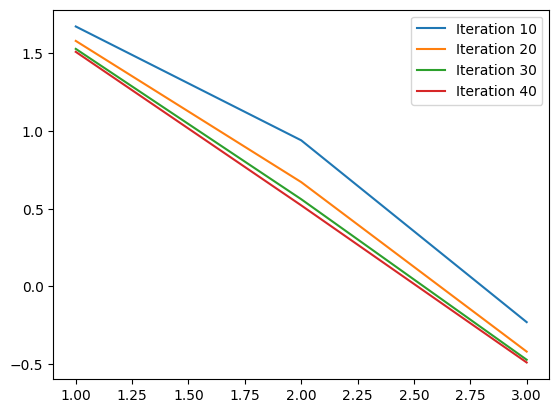

[1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1, 2, 3][1.51045, 0.521485, -0.49057]

In [11]:
using PyPlot
using LinearAlgebra

function jacobi(A,b,iter)
    A = float(A)
    
    D = Diagonal(A)
    R = A - D
    D_inv = inv(D)
    
    sol = b
    
    for i = 1:iter
        sol = D_inv*(b- R*sol)
        if i% 10 == 0
            plot(collect(1:size(sol,1)) , sol, label= "Iteration $(i)")
        end
    end 
    plt.legend()
    return sol
end 


J = 20
#create A

#create b


print(jacobi(A,b,40))

In [ ]:

function cholesky(A)
end
